# VISUALIZATION OF CAR MOVEMENT

In this notebook, by using the pillow package of the python, the agent movements are visualized. 

The 'draw_area' function is created to visualize roads, agent, parking lots, and target place.

* The target place is shown by the red rectangle
* The target parking space nearest to the target place is shown by a red 'X'
* Other available parking lots are shown by green 'X'
* The starting position of the agent is shown by a blue unfilled rectangle
* The current position of the agent is shown by a blue filled rectangle

In [3]:
from environments import Field_1, Field_2, Field_3, Field_4, Field_5, Field_6, Field_7, Field_4_tr
import matplotlib.pyplot as plt
import math
import numpy as np
import random

In [12]:
from PIL import Image, ImageDraw, ImageFont

def draw_area(start_position, target_position, parking_lot_coor, current_location):
    image = Image.new("RGB", (200, 200), "white") # create white canvas
    draw = ImageDraw.Draw(image)
    
    # visualize target place
    draw.text((12, 25), "Target", fill="red")
    draw.rectangle((20,40,40,60), fill="red")
    
    # draw roads
    draw.line([(50, 0), (50, 70), (0, 70)], width=2, fill="black", joint="curve")
    draw.line([(0, 90), (50, 90), (50, 120), (0,120)], width=2, fill="black", joint="curve")
    draw.line([(0, 140), (50, 140), (50, 200)], width=2, fill="black", joint="curve")
    draw.line([(70, 0), (70, 70), (110, 70),(110,0)], width=2, fill="black", joint="curve")
    draw.line([(70, 90), (70, 120), (110, 120),(110,90),(70, 90)], width=2, fill="black", joint="curve")
    draw.line([(70, 200), (70, 140), (110, 140),(110,200)], width=2, fill="black", joint="curve")
    draw.line([(130, 0), (130, 70), (200, 70)], width=2, fill="black", joint="curve")
    draw.line([(200, 90), (130, 90), (130, 120),(200,120)], width=2, fill="black", joint="curve")
    draw.line([(200, 140), (130, 140), (130, 200)], width=2, fill="black", joint="curve")

    # show available parking lots with green 'X'
    for park in parking_lot_coor:
        draw.text((park[0]*10, park[1]*10), "X", fill="green")

    # show target parking lot with red 'X'
    target_position = list(target_position)
    draw.text((target_position[0]*10, target_position[1]*10), "X", fill="red")

    # show starting position of the agent with blue unfilled rectangle
    start_position = list(start_position)
    draw.rectangle((start_position[0]*10,start_position[1]*10,(start_position[0]*10)+10,(start_position[1]*10)+10), fill="white", outline="blue")

    # show current position of the agent with blue filled rectangle
    current_location = list(current_location)
    draw.rectangle((current_location[0]*10,current_location[1]*10,(current_location[0]*10)+10,(current_location[1]*10)+10), fill="blue")

    #image.show()
    display(image)

The decided optimized environment "Field_4" is used to visualize the agent below.

Only the last episode of the agent is shown.

The 20x20 coordinate system is used to visualize with the following constants:
* Size: 20 
* Starting position: (19, 12) # start agent from this position
* Target position: (5, 5)  # give target location to park
* Parking lots positions: [[12, 16], [9, 12], [14, 7], [5, 5]] 

You can play with the following to see agent movement whenever you want. The 'draw_area' only suitable for 20x20 coordinate sytem with 2 vertical and 2 horizontal road. 

---------STEP-1---------


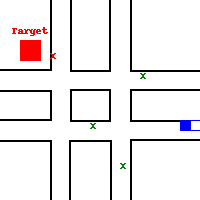

---------STEP-2---------


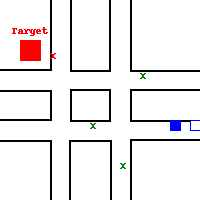

---------STEP-3---------


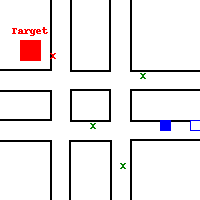

---------STEP-4---------


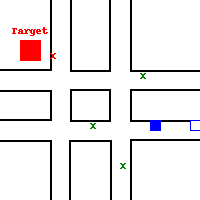

---------STEP-5---------


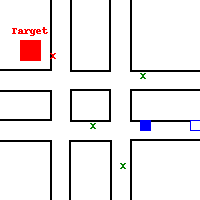

---------STEP-6---------


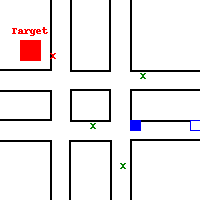

---------STEP-7---------


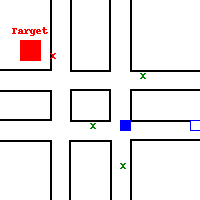

---------STEP-8---------


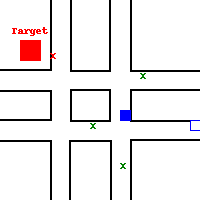

---------STEP-9---------


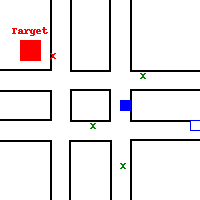

---------STEP-10---------


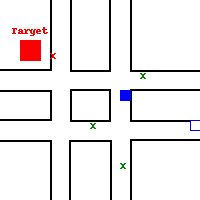

---------STEP-11---------


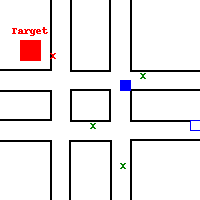

---------STEP-12---------


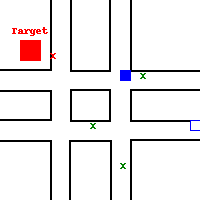

---------STEP-13---------


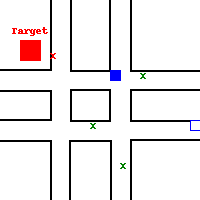

---------STEP-14---------


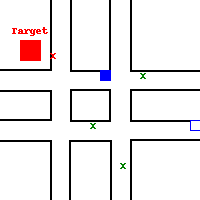

---------STEP-15---------


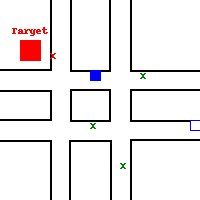

---------STEP-16---------


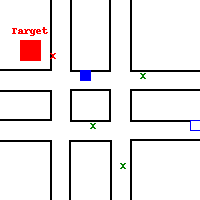

---------STEP-17---------


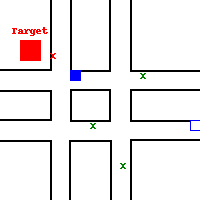

---------STEP-18---------


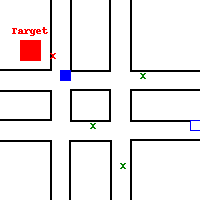

---------STEP-19---------


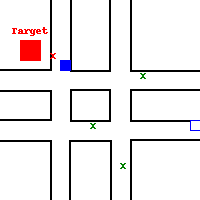

---------STEP-20---------


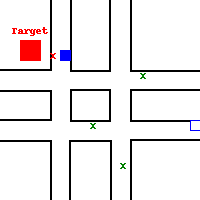

---------STEP-21---------


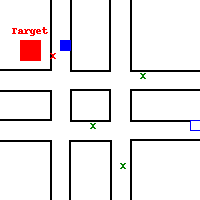

---------STEP-22---------


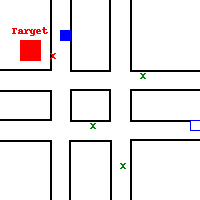

---------STEP-23---------


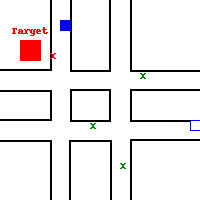

---------STEP-24---------


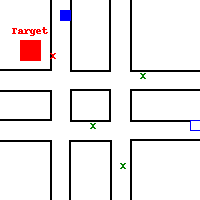

---------STEP-25---------


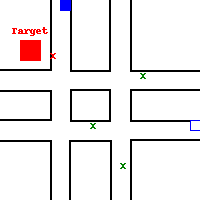

---------STEP-26---------


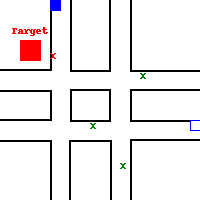

---------STEP-27---------


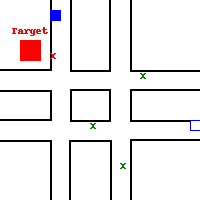

---------STEP-28---------


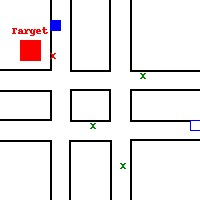

---------STEP-29---------


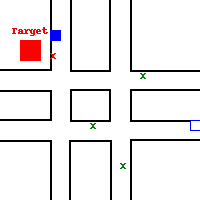

---------STEP-30---------


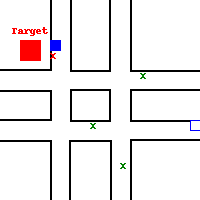

---------STEP-31---------


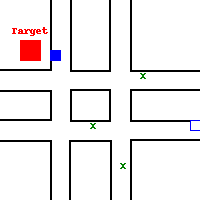

---------STEP-32---------


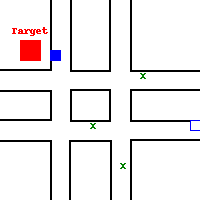

In [13]:
# learning...

def reinforcement_q_visual(alpha, gamma):
    # give constants
    size = 20 # size of the canvas/coordination system
    start_position = (19, 12) # start agent from this position
    target_position = (5, 5)  # give target location to park
    parking_lot_coor = [[12, 16], [9, 12], [14, 7], [5, 5]]  # give all empty parking space location #it should include the target
    #target_position = (1, 12)
    #parking_lot_coor = [[1, 12], [9, 12], [14, 7], [8, 7]]

    # initialize environment
    field = Field_4(size, start_position, target_position, parking_lot_coor)

    # create number of states according to size
    number_of_states = field.get_number_of_states()
    number_of_actions = 5  # it's certain # left, right, up, down, park

    # create empty q table
    q_table = np.zeros((number_of_states, number_of_actions))

    # determine hyperparameter
    alpha = alpha # parameter to tune
    gamma = gamma # parameter to tune
    epsilon = 1 # start epsilon from 1
    max_epsilon = 1
    min_epsilon = 0.01
    decay = 0.01  # use decay to balance exploration and exploitation

    # give number of episodes
    train_episodes = 1000

    # keep the metrics to evaluate learning process
    steps = [] # keep number of steps
    target_or_not = [] # keep info of if the agent finds the target or park another location
    training_rewards = [] # keep rewards

    for episode in range(train_episodes):

        # initialize env in the learning loop
        field = Field_4(size, start_position, target_position, parking_lot_coor)
        done = False # to finish the episode

        step = 0
        total_training_rewards = 0
        
        while not done:  # if done is true, finish the episode
            state = field.get_state() # start with learning state of the agent

            if random.uniform(0, 1) > epsilon:  # explore or exploit
                action = np.argmax(q_table[state])  # exploit
            else:
                action = random.randint(0, 4)  # explore

            reward, done = field.make_action(action)  # position can be change

            total_training_rewards += reward # sum rewards

            new_state = field.get_state()  # enter new state according to new position
            new_state_max = np.max(q_table[new_state]) # learn which q value is max for the next state to calculate q value

            # update q table
            q_table[state, action] = (1 - alpha) * q_table[state, action] + alpha * (
                        reward + gamma * new_state_max - q_table[state, action])

            step = step + 1 # increase step value

            # to learn the parking location whether is the target location or not
            target_tf = False
            if field.position == field.target_position:
                target_tf = True

            end_location = field.position # keep end location of this state to trace the

            #if step%10==0:
            if episode == train_episodes-1:
                print(f"---------STEP-{step}---------")
                draw_area(start_position, target_position, parking_lot_coor, field.position)

        # cut down on exploration by reducing the epsilon
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay * episode)

        # append all values of episodes to their list
        steps.append(step)
        target_or_not.append(target_tf)
        training_rewards.append(total_training_rewards)

    return np.mean(steps), np.mean(training_rewards), steps, target_or_not

avg_steps, avg_rewards, steps, target_or_not = reinforcement_q_visual(alpha=0.1, gamma=0.6)



# TRAFFIC IN THE ROAD

In this section, the traffic in the environment is considered and a new environment "Field_4_tr" is created for this purpose. As you know, "Field_4" is chosen as a regular environment for this project. The regular and traffic environments are used to see the differences and how the agent acts. 

In the function of "reinforcement_q_visual", "Field_4" was used, in the function of "reinforcement_q_visual_tr", "Field_4_tr" was used. And all sizes, start_position, target_position, and parking_lot_coor are the same for these two q-learning processes, only the environment is different. 

As you can see below, the agent (blue rectangle) should park at the target(closest) parking place (red 'X'). So we expect the agent will go directly to the left to reach the target. But the road shown by the red arrow has lots of traffic. So with the environment "Field_4_tr" the agent decided not to go along the road with traffic, then it decided to go the road below. You can see the last path of the agents for each environment below.

The learning in the regular environment was completed with **21** steps.
The learning in the environment with traffic was completed with **29** steps.

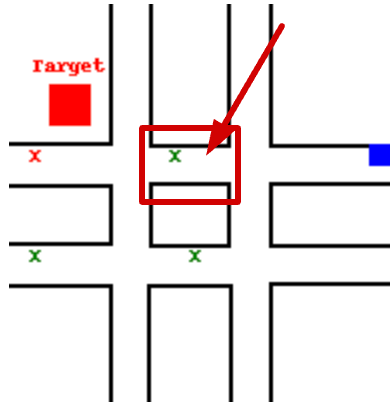

---------STEP-1---------


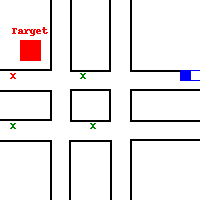

---------STEP-2---------


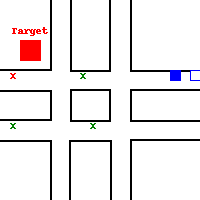

---------STEP-3---------


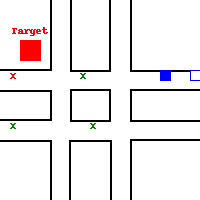

---------STEP-4---------


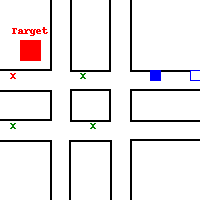

---------STEP-5---------


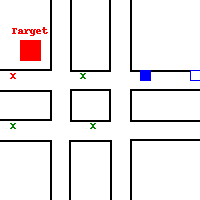

---------STEP-6---------


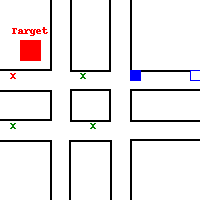

---------STEP-7---------


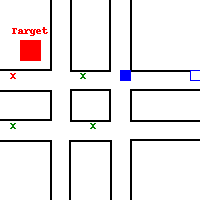

---------STEP-8---------


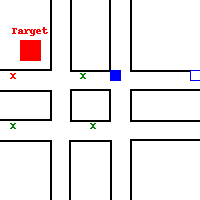

---------STEP-9---------


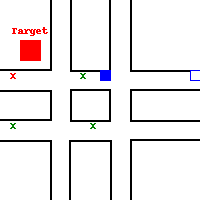

---------STEP-10---------


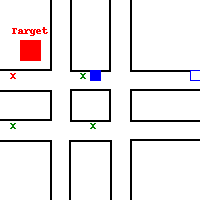

---------STEP-11---------


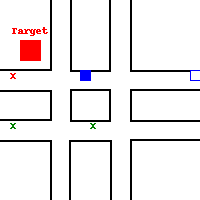

---------STEP-12---------


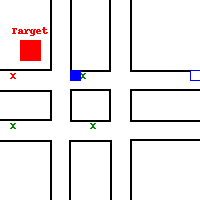

---------STEP-13---------


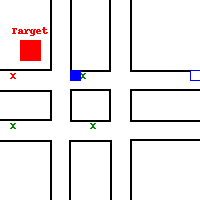

---------STEP-14---------


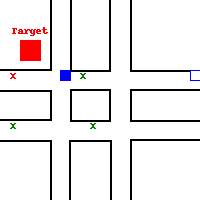

---------STEP-15---------


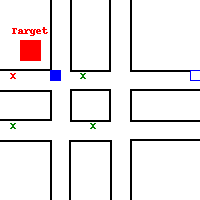

---------STEP-16---------


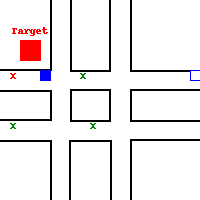

---------STEP-17---------


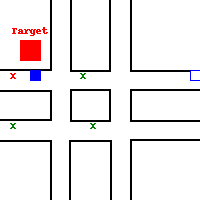

---------STEP-18---------


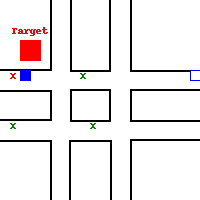

---------STEP-19---------


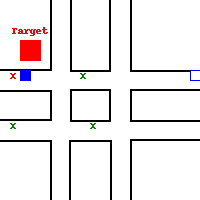

---------STEP-20---------


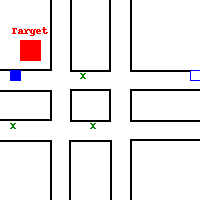

---------STEP-21---------


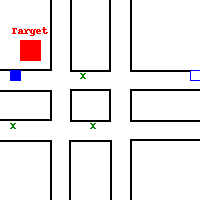

In [3]:
# learning without traffic...

def reinforcement_q_visual(alpha, gamma):
    # give constants
    size = 20 # size of the canvas/coordination system
    start_position = (19, 7) # start agent from this position
    target_position = (1, 7) # give target location to park
    parking_lot_coor = [[1, 12], [9, 12], [8, 7], [1, 7]] # give all empty parking space location #it should include the target

    # initialize environment
    field = Field_4(size, start_position, target_position, parking_lot_coor)

    # create number of states according to size
    number_of_states = field.get_number_of_states()
    number_of_actions = 5  # it's certain # left, right, up, down, park

    # create empty q table
    q_table = np.zeros((number_of_states, number_of_actions))

    # determine hyperparameter
    alpha = alpha # parameter to tune
    gamma = gamma # parameter to tune
    epsilon = 1 # start epsilon from 1
    max_epsilon = 1
    min_epsilon = 0.01
    decay = 0.01  # use decay to balance exploration and exploitation

    # give number of episodes
    train_episodes = 1000

    # keep the metrics to evaluate learning process
    steps = [] # keep number of steps
    target_or_not = [] # keep info of if the agent finds the target or park another location
    training_rewards = [] # keep rewards

    for episode in range(train_episodes):

        # initialize env in the learning loop
        field = Field_4(size, start_position, target_position, parking_lot_coor)
        done = False # to finish the episode

        step = 0
        total_training_rewards = 0
        
        while not done:  # if done is true, finish the episode
            state = field.get_state() # start with learning state of the agent

            if random.uniform(0, 1) > epsilon:  # explore or exploit
                action = np.argmax(q_table[state])  # exploit
            else:
                action = random.randint(0, 4)  # explore

            reward, done = field.make_action(action)  # position can be change

            total_training_rewards += reward # sum rewards

            new_state = field.get_state()  # enter new state according to new position
            new_state_max = np.max(q_table[new_state]) # learn which q value is max for the next state to calculate q value

            # update q table
            q_table[state, action] = (1 - alpha) * q_table[state, action] + alpha * (
                        reward + gamma * new_state_max - q_table[state, action])

            step = step + 1 # increase step value

            # to learn the parking location whether is the target location or not
            target_tf = False
            if field.position == field.target_position:
                target_tf = True

            end_location = field.position # keep end location of this state to trace the

            #if step%10==0:
            if episode == train_episodes-1:
                print(f"---------STEP-{step}---------")
                draw_area(start_position, target_position, parking_lot_coor, field.position)

        # cut down on exploration by reducing the epsilon
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay * episode)

        # append all values of episodes to their list
        steps.append(step)
        target_or_not.append(target_tf)
        training_rewards.append(total_training_rewards)

    return np.mean(steps), np.mean(training_rewards), steps, target_or_not

avg_steps, avg_rewards, steps, target_or_not = reinforcement_q_visual(alpha=0.1, gamma=0.6)



---------STEP-1---------


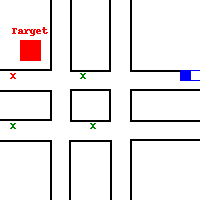

---------STEP-2---------


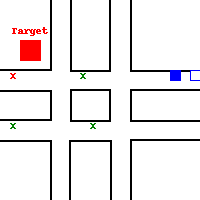

---------STEP-3---------


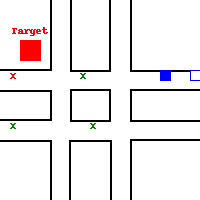

---------STEP-4---------


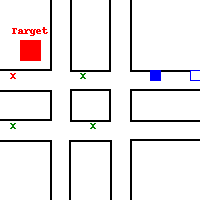

---------STEP-5---------


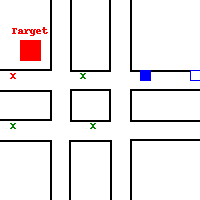

---------STEP-6---------


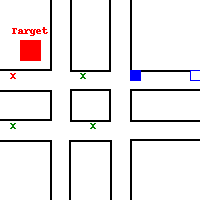

---------STEP-7---------


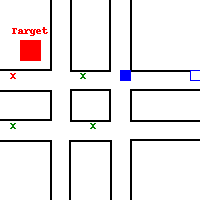

---------STEP-8---------


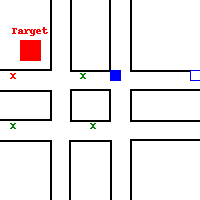

---------STEP-9---------


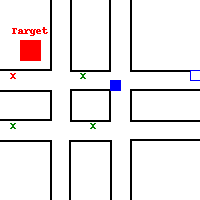

---------STEP-10---------


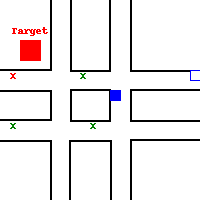

---------STEP-11---------


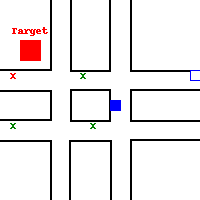

---------STEP-12---------


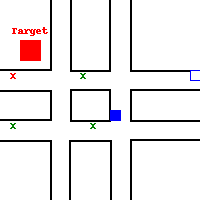

---------STEP-13---------


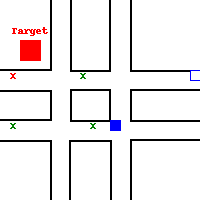

---------STEP-14---------


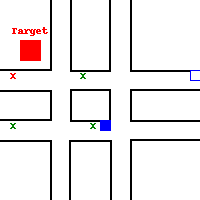

---------STEP-15---------


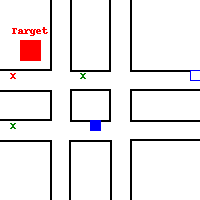

---------STEP-16---------


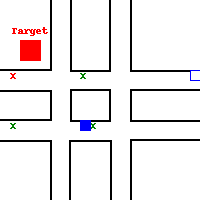

---------STEP-17---------


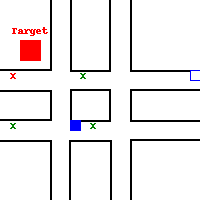

---------STEP-18---------


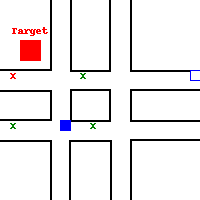

---------STEP-19---------


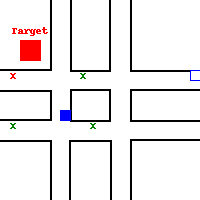

---------STEP-20---------


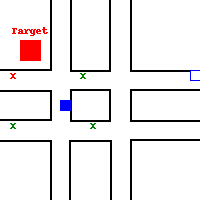

---------STEP-21---------


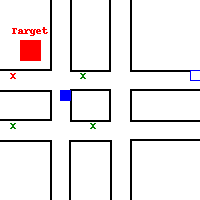

---------STEP-22---------


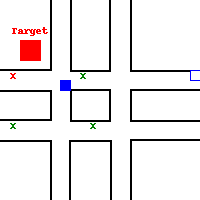

---------STEP-23---------


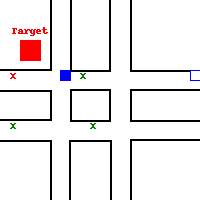

---------STEP-24---------


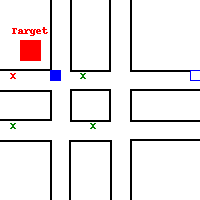

---------STEP-25---------


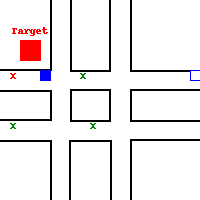

---------STEP-26---------


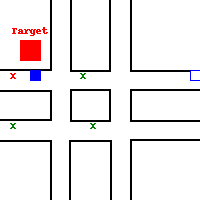

---------STEP-27---------


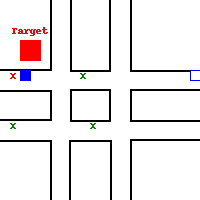

---------STEP-28---------


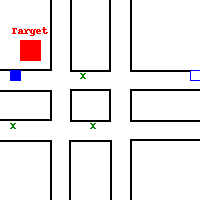

---------STEP-29---------


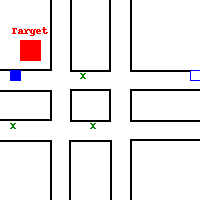

In [5]:
# learning with traffic...

def reinforcement_q_visual_tr(alpha, gamma):
    # give constants
    size = 20 # size of the canvas/coordination system
    start_position = (19, 7) # start agent from this position
    target_position = (1, 7) # give target location to park
    parking_lot_coor = [[1, 12], [9, 12], [8, 7], [1, 7]] # give all empty parking space location #it should include the target

    # initialize environment
    field = Field_4_tr(size, start_position, target_position, parking_lot_coor)

    # create number of states according to size
    number_of_states = field.get_number_of_states()
    number_of_actions = 5  # it's certain # left, right, up, down, park

    # create empty q table
    q_table = np.zeros((number_of_states, number_of_actions))

    # determine hyperparameter
    alpha = alpha # parameter to tune
    gamma = gamma # parameter to tune
    epsilon = 1 # start epsilon from 1
    max_epsilon = 1
    min_epsilon = 0.01
    decay = 0.01  # use decay to balance exploration and exploitation

    # give number of episodes
    train_episodes = 1000

    # keep the metrics to evaluate learning process
    steps = [] # keep number of steps
    target_or_not = [] # keep info of if the agent finds the target or park another location
    training_rewards = [] # keep rewards

    for episode in range(train_episodes):

        # initialize env in the learning loop
        field = Field_4_tr(size, start_position, target_position, parking_lot_coor)
        done = False # to finish the episode

        step = 0
        total_training_rewards = 0
        
        while not done:  # if done is true, finish the episode
            state = field.get_state() # start with learning state of the agent

            if random.uniform(0, 1) > epsilon:  # explore or exploit
                action = np.argmax(q_table[state])  # exploit
            else:
                action = random.randint(0, 4)  # explore

            reward, done = field.make_action(action)  # position can be change

            total_training_rewards += reward # sum rewards

            new_state = field.get_state()  # enter new state according to new position
            new_state_max = np.max(q_table[new_state]) # learn which q value is max for the next state to calculate q value

            # update q table
            q_table[state, action] = (1 - alpha) * q_table[state, action] + alpha * (
                        reward + gamma * new_state_max - q_table[state, action])

            step = step + 1 # increase step value

            # to learn the parking location whether is the target location or not
            target_tf = False
            if field.position == field.target_position:
                target_tf = True

            end_location = field.position # keep end location of this state to trace the

            #if step%10==0:
            if episode == train_episodes-1:
                print(f"---------STEP-{step}---------")
                draw_area(start_position, target_position, parking_lot_coor, field.position)

        # cut down on exploration by reducing the epsilon
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay * episode)

        # append all values of episodes to their list
        steps.append(step)
        target_or_not.append(target_tf)
        training_rewards.append(total_training_rewards)

    return np.mean(steps), np.mean(training_rewards), steps, target_or_not

avg_steps, avg_rewards, steps, target_or_not = reinforcement_q_visual_tr(alpha=0.1, gamma=0.6)



**ENJOY !**